In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import colormaps as cmaps

In [20]:
df500 = pd.read_csv("./flux_selection_k500_n5000_N10.csv", index_col=0)
df5000 = pd.read_csv("./flux_selection_k5000_n5000_N10.csv", index_col=0)

print(df500.columns)
print(df5000.columns)

df500.drop(columns=['HMR_4546'], inplace=True)
df5000.drop(columns=['HMR_4546'], inplace=True)

df500["k"] = 500
df5000["k"] = 5000

df5000_ = df5000.copy()
df5000_['file_n'] = df5000_['file_n'] + 16

df_combined = pd.concat([df500, df5000_])

df_combined

Index(['file_n', 'sample_n', 'file_name', 'HMR_1465', 'HMR_3179', 'HMR_4546',
       'HMR_6021', 'HMR_8436'],
      dtype='object')
Index(['file_n', 'sample_n', 'file_name', 'HMR_1465', 'HMR_3179', 'HMR_4546',
       'HMR_6021', 'HMR_8436'],
      dtype='object')


,file_n,sample_n,file_name,HMR_1465,HMR_3179,HMR_6021,HMR_8436,k
label,,,,,,,,
liver_hepatocytes,0,2160,liver_hepatocytes_5000(3),1.845519,331.003205,-28.877126,345.268601,500
liver_hepatocytes,0,4186,liver_hepatocytes_5000(3),47.371315,103.757659,-104.310448,184.546121,500
liver_hepatocytes,0,2991,liver_hepatocytes_5000(3),21.494231,202.721908,-191.924644,196.860073,500
liver_hepatocytes,0,3182,liver_hepatocytes_5000(3),16.450797,241.739933,-65.415672,393.449150,500
liver_hepatocytes,0,531,liver_hepatocytes_5000(3),-20.075460,121.268198,-164.934120,326.047092,500
...,...,...,...,...,...,...,...,...
liver_hepatocytes,31,3102,liver_hepatocytes_5000(0),-20.657327,237.268728,2.934220,372.726806,5000
liver_hepatocytes,31,3556,liver_hepatocytes_5000(0),-9.779383,155.537006,13.111789,299.818807,5000
liver_hepatocytes,31,3221,liver_hepatocytes_5000(0),52.154632,-99.089092,190.846159,330.343245,5000


In [21]:
fluxes = df_combined.columns.difference(['label'])

flux_range = {
    flux: (df_combined[flux].min(), df_combined[flux].max())
    for flux in fluxes
}

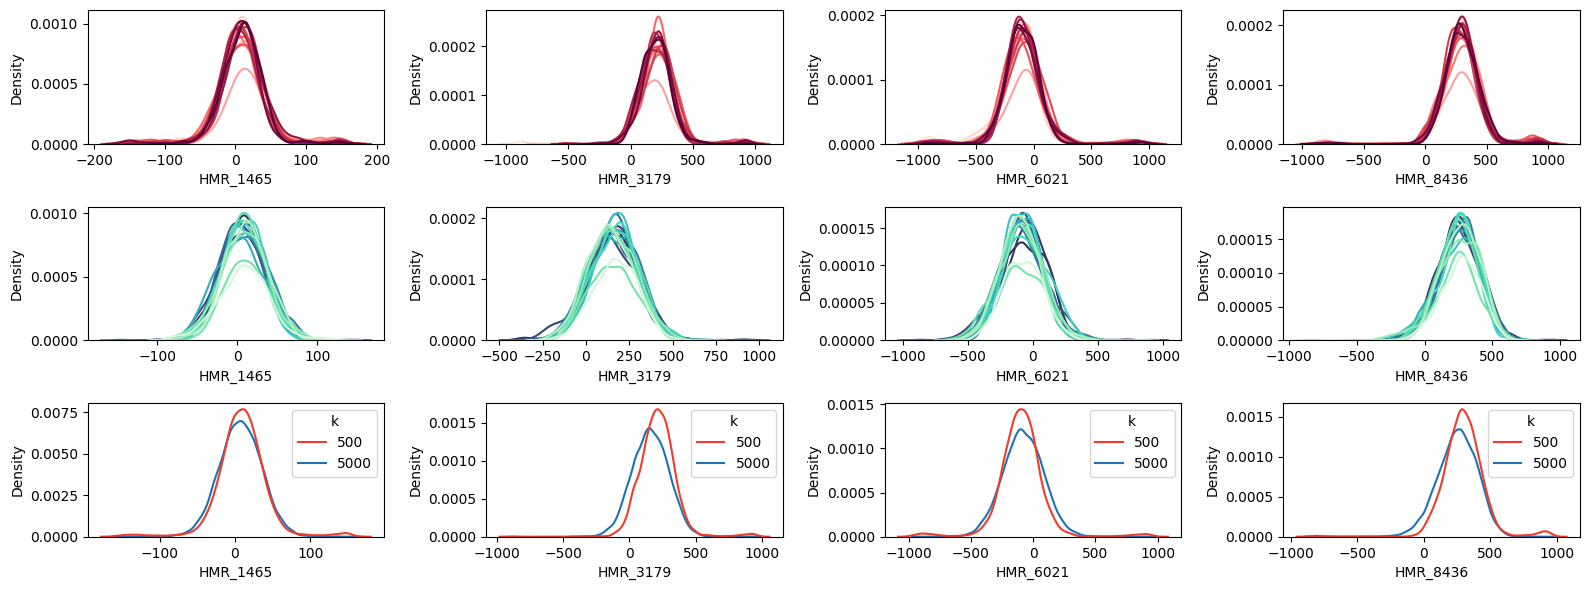

In [48]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 4, figsize=(16, 6))

def hist(df, flux, ax, colors):
    ns = df['file_n'].unique()

    flux_values = None
    for n in ns:
        n_df = df[df['file_n'] == n][flux]
        values = n_df.values

        if flux_values is None:
            flux_values = np.array([values]).T
        else:
            new_length = min(flux_values.shape[0], len(values))
            flux_values = np.block([
                flux_values[:new_length,:], 
                values[:new_length,None]
            ])


    ax.hist(flux_values, 
            bins=40, 
            stacked=True, 
            range=flux_range[flux],
            color=colors)

    ax.set_title(flux)

def plot(df : pd.DataFrame, axs, palette):
    for ax, flux in zip(axs, fluxes):
        sns.kdeplot(data=df, x=flux, hue="file_n", legend=False, ax=ax, palette=palette)

colors250 = cmaps.bl_11.discrete(16).colors
colors2500 = list(reversed(cmaps.fushia_red_pink1.discrete(16).colors))

plot(df500, ax1, cmaps.fushia_red_pink1)
plot(df5000, ax2, cmaps.bl_11)


for flux, ax in zip(fluxes, ax3):
    sns.kdeplot(data=df_combined, x=flux, ax=ax, hue="k", palette=cmaps.temp_diff_1lev)
    

fig.tight_layout() 

plt.savefig("./sampling_histogram.png", dpi=400)

In [45]:
[cmaps.bl_11, cmaps.fushia_red_pink1]

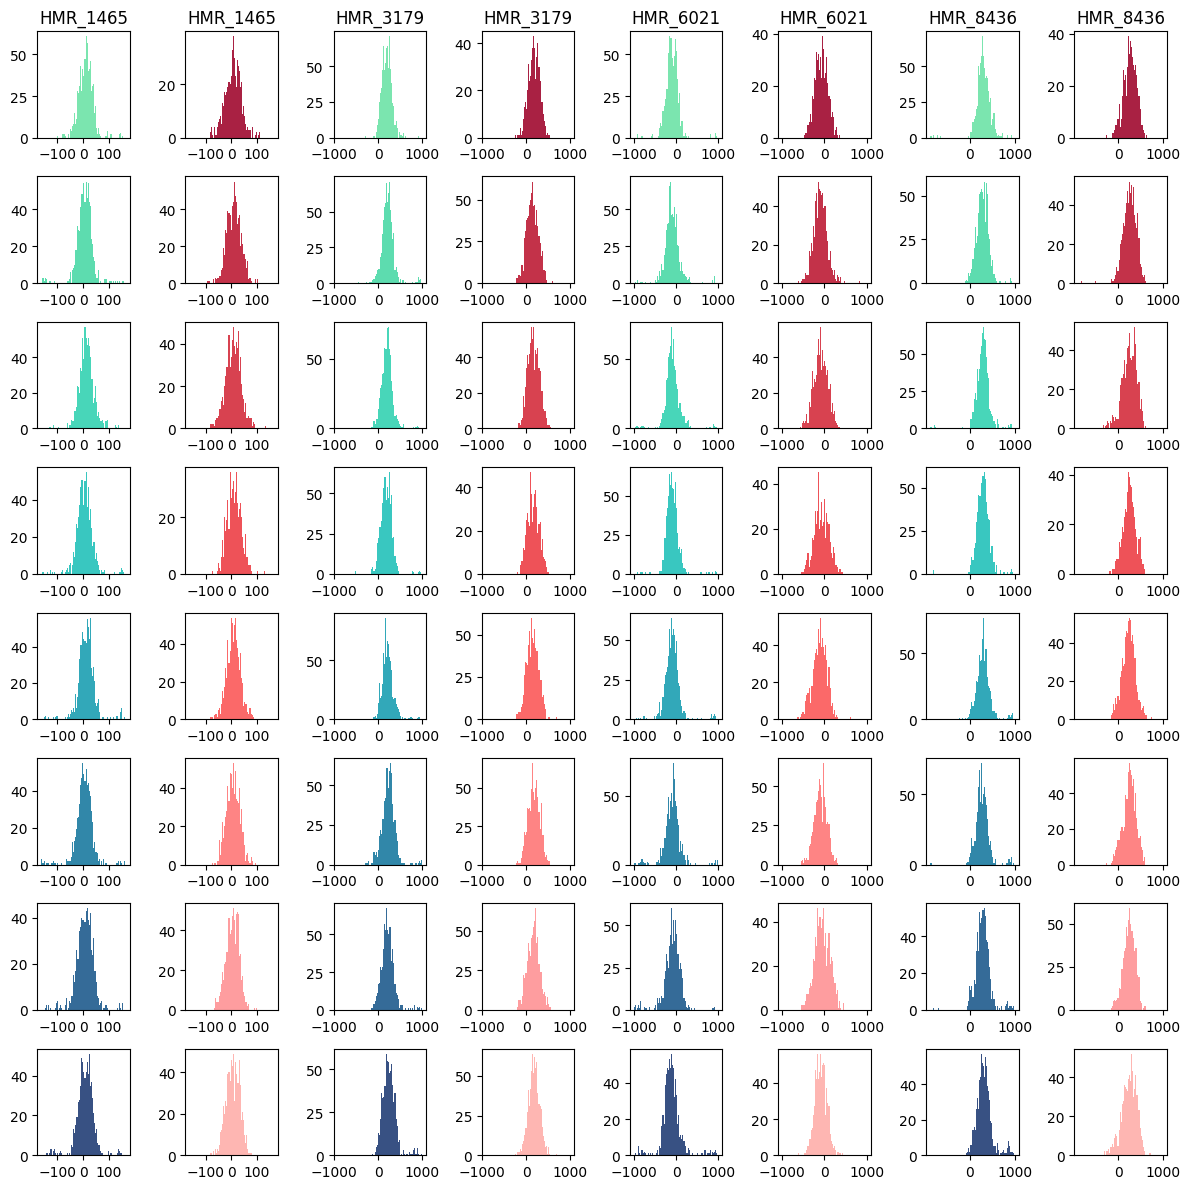

In [13]:
fig, axss = plt.subplots(8, 8, figsize=(12,12))

axs = sum([list(axs) for axs in axss], start=[])

colors250 = cmaps.bl_11.discrete(12).colors[2:-2]
colors2500 = cmaps.fushia_red_pink1.discrete(12).colors[2:-2]

def plot(df, axs, color, ax_fn):
    for i,flux in enumerate(df.columns.difference(['label', 'file_n'])):
        ax_i = ax_fn(i)
        if ax_i >= len(axs):
            continue
        ax = axs[ax_i]
        ax.hist(df[flux], bins=80, range=flux_range[flux], color=color)
        #ax.set_xticklabels([])
        #ax.set_yticklabels([])

def split_dfs_by_file_n(df):
    return [
        df[df['file_n'] == fn]
        for fn in df['file_n'].unique()
    ]

def titles(axs, flux_fn):
    for i, ax in enumerate(axs):
        flux_i = flux_fn(i)
        if flux_i > len(fluxes):
            continue
        ax.set_title(fluxes[flux_i])


df250_split = split_dfs_by_file_n(df500)
df2500_split = split_dfs_by_file_n(df5000)

for df, axs, color in zip(df250_split, axss, colors250):
    plot(df, axs, color, lambda i: 2*i)
for df, axs, color in zip(df2500_split, axss, colors2500):
    plot(df, axs, color, lambda i: 2*i + 1)

titles(axss[0], lambda i: i // 2)

fig.tight_layout()
fig.savefig("./split_histogram.png", dpi=400)